<a href="https://colab.research.google.com/github/jacksonsin/machine_learning_with_python/blob/main/Singapore_Pools_version1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install library for GA Model
!pip install pygad

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Calculate the permutation for 2D Lottery
import itertools
val = [x for x in range(0,10)]
permutations = [v for v in itertools.product(val, repeat=2)] #2D permuatation with replacement
size_n = len(permutations)
print(size_n)

100


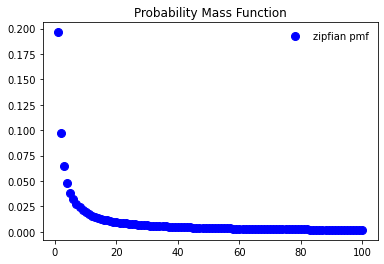

In [3]:
# Plot Probability Mass Function - Zeta Distribution
import numpy as np
from scipy.stats import zipf
from scipy.stats import zipfian
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
a, n = 1.01, size_n+1
mean, var, skew, kurt = zipfian.stats(a, n, moments='mvsk')
x = np.arange(zipfian.ppf(0.001, a, n),
              zipfian.ppf(0.999, a, n))
ax.plot(x, zipfian.pmf(x, a, n), 'bo', ms=8, label='zipfian pmf')
ax.legend(loc='best', frameon=False)
plt.title(f"Probability Mass Function".format())
plt.show()

In [4]:
# check size of x is 100
len(zipfian.cdf(x, a, n))

100

In [5]:
# Probability of Best Case Scenario
best = zipfian.pmf(x, a, n)[-1] # Probability of people buying popular pair
print(best)

0.0018751427350314342


In [6]:
# Probability of Average Case Scenario
avg = zipfian.pmf(x, a, n)[len(zipfian.pmf(x, a, n)) // 2] # Probability of people buying ordinary pair
print(avg)

0.003701591197830854


In [7]:
# Probability of Worst Case Scenario
worst = zipfian.pmf(x, a, n)[0] # Probability of people buying least popular pair
print(worst)

0.19635154895216583


In [8]:
# Configure GA Model
import pygad

def fitness_function(solution, solution_idx):
    return sum(solution)

ga_instance = pygad.GA(num_generations=1,
                       num_parents_mating=10,
                       sol_per_pop=1000000,
                       num_genes=6,
                       fitness_func=fitness_function,

                       init_range_low=0,
                       init_range_high=999999,

                       gene_type=int)

/usr/local/lib/python3.7/dist-packages/pygad/pygad.py:473: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))


In [9]:
# Deploy GA Model
from random import randrange
""" Capital + Annual Sales - Fixed - Variable - Payout   | Avg Ticket Sold
      x[0]       x[1]         x[2]      x[3]     x[4]    |      x[5]
"""
draws = 365 // 4 
capital = 10000000
fixed = 10000000

def ga_best_scenario():
  data = []
  for x in ga_instance.initial_population.tolist():
      x[0] = capital # Initial Capital
      x[1] = 1 * x[5] * draws # Annual Sales = $1 x average tickets sold x  x draws
      x[2] = fixed # Fixed cost
      x[3] = x[1] * 0.05  # Variable cost
      x[4] = x[5] * best * draws * 70
      if (x[0]+x[1]-x[2]-x[3]-x[4])>capital:
        data.append(x)
      else:
        pass
  return data

def ga_avg_scenario():
  data = []
  for x in ga_instance.initial_population.tolist():
      x[0] = capital # Initial Capital
      x[1] = 1 * x[5] * draws # Annual Sales = $1 x average tickets sold x  x draws
      x[2] = fixed # Fixed cost
      x[3] = x[1] * 0.05  # Variable cost
      x[4] = x[5] * avg * draws * 70
      if (x[0]+x[1]-x[2]-x[3]-x[4])>capital:
        data.append(x)
      else:
        pass
  return data

def ga_worst_scenario():
  data = []
  for x in ga_instance.initial_population.tolist():
      x[0] = capital # Initial Capital
      x[1] = 1 * x[5] * draws # Annual Sales = $1 x average tickets sold x  x draws
      x[2] = fixed # Fixed cost
      x[3] = x[1] * 0.05  # Variable cost
      x[4] = x[5] * worst * draws * 70
      if (x[0]+x[1]-x[2]-x[3]-x[4])>capital:
        data.append(x)
      else:
        data.append(x)
  return data

In [10]:
# Check Balance (debugging use)
#sum(ga_best_scenario()[0]),sum(ga_best_scenario()[1]),sum(ga_best_scenario()[2])
#sum(ga_avg_scenario()[0]),sum(ga_avg_scenario()[1]),sum(ga_avg_scenario()[2])
#sum(ga_worst_scenario()[0]),sum(ga_worst_scenario()[1]),sum(ga_worst_scenario()[2])

In [11]:
# (debugging use)
#ga_best_scenario()[0], ga_avg_scenario()[0], ga_worst_scenario()[0]

In [12]:
# (debugging use)
#ga_best_scenario()[1], ga_avg_scenario()[1], ga_worst_scenario()[1]

In [13]:
# Return Mininum Sales in Best Case Scenario
def eval_scenario(var):
  new_list = []
  min_sales = []
  for x in range(len(var)):
    new_list.append(x)
    min_sales.append(var[x][1])
  return min(min_sales)
input = eval_scenario(ga_best_scenario())

In [14]:
# Search the array with the minimum sales
def search(arg):
  for i in arg:
    if i[1] == input:
      return i
    else:
      pass
search(ga_best_scenario())

[10000000, 12213929, 10000000, 610696.4500000001, 1603200.2161377827, 134219]

In [15]:
# Check the balance
index = ga_best_scenario().index(search(ga_best_scenario()))
ga_best_scenario()[index][0]+ga_best_scenario()[index][1]-ga_best_scenario()[index][2]-ga_best_scenario()[index][3]-ga_best_scenario()[index][4]

10000032.333862219

In [16]:
# Summarise
import math
tickets_sold = search(ga_best_scenario())[5]
variable = search(ga_best_scenario())[3]
best_scenario = search(ga_best_scenario())[4]
sales = search(ga_best_scenario())[1]
balance1 = capital + sales - fixed - variable - best_scenario
print(f"Best Case Scenario After {draws} Draws".format())
print(f"Probability of Customers Buying The Pair: {best*100:.1f}%".format())
print("=========================")
print(f"Tickets Sold    = {tickets_sold*draws:,}".format())
print(f"Initial Balance = ${capital:,}".format())
print(f"Sales           = ${sales:,}".format()) 
print(f"Fixed Cost      = ${fixed:,}".format())
print(f"Variable Cost   = ${math.trunc(variable):,}".format())
print(f"Payout          = ${math.trunc(best_scenario):,}".format()) 
print("=========================")
print(f"Balance         = ${math.trunc(balance1):,}".format())

Best Case Scenario After 91 Draws
Probability of Customers Buying The Pair: 0.2%
Tickets Sold    = 12,213,929
Initial Balance = $10,000,000
Sales           = $12,213,929
Fixed Cost      = $10,000,000
Variable Cost   = $610,696
Payout          = $1,603,200
Balance         = $10,000,032


In [17]:
# Return Mininum Sales in Average Case Scenario
def eval_scenario(var):
  new_list = []
  min_sales = []
  for x in range(len(var)):
    new_list.append(x)
    min_sales.append(var[x][1])
  return min(min_sales)
input = eval_scenario(ga_avg_scenario())

In [18]:
# Search the list
def search(arg):
  for i in arg:
    if i[1] == input:
      return i
    else:
      pass
search(ga_avg_scenario())

[10000000, 14474187, 10000000, 723709.3500000001, 3750426.623647044, 159057]

In [19]:
# Check the balance
index = ga_avg_scenario().index(search(ga_avg_scenario()))
ga_avg_scenario()[index][0]+ga_avg_scenario()[index][1]-ga_avg_scenario()[index][2]-ga_avg_scenario()[index][3]-ga_avg_scenario()[index][4]

10000051.026352957

In [20]:
# Summarise
import math
tickets_sold = search(ga_avg_scenario())[5]
variable = search(ga_avg_scenario())[3]
avg_scenario = search(ga_avg_scenario())[4]
sales = search(ga_avg_scenario())[1]
balance2 = capital + sales - fixed - variable - avg_scenario
print(f"Average Case Scenario After {draws} Draws".format())
print(f"Probability of Customers Buying The Pair: {avg*100:.1f}%".format())
print("=========================")
print(f"Tickets Sold    = {tickets_sold*draws:,}".format())
print(f"Initial Balance = ${capital:,}".format())
print(f"Sales           = ${sales:,}".format()) 
print(f"Fixed Cost      = ${fixed:,}".format())
print(f"Variable Cost   = ${math.trunc(variable):,}".format())
print(f"Payout          = ${math.trunc(avg_scenario):,}".format()) 
print("=========================")
print(f"Balance         = ${math.trunc(balance2):,}".format())

Average Case Scenario After 91 Draws
Probability of Customers Buying The Pair: 0.4%
Tickets Sold    = 14,474,187
Initial Balance = $10,000,000
Sales           = $14,474,187
Fixed Cost      = $10,000,000
Variable Cost   = $723,709
Payout          = $3,750,426
Balance         = $10,000,051


In [21]:
# Return Mininum Sales in Worst Case Scenario
def eval_scenario(var):
  new_list = []
  min_sales = []
  for x in range(len(var)):
    new_list.append(x)
    min_sales.append(var[x][1])
  return min(min_sales)
input = eval_scenario(ga_worst_scenario())

In [22]:
# Search the list
def search(arg):
  for i in arg:
    if i[1] == input:
      return i
    else:
      pass
search(ga_worst_scenario())

[10000000, 0, 10000000, 0.0, 0.0, 0]

In [23]:
# Check the balance
index = ga_worst_scenario().index(search(ga_worst_scenario()))
ga_worst_scenario()[index][0]+ga_worst_scenario()[index][1]-ga_worst_scenario()[index][2]-ga_worst_scenario()[index][3]-ga_worst_scenario()[index][4]

0.0

In [24]:
# Summarise
import math
tickets_sold = search(ga_worst_scenario())[5]
variable = search(ga_worst_scenario())[3]
worst_scenario = search(ga_worst_scenario())[4]
sales = search(ga_worst_scenario())[1]
balance3 = capital + sales - fixed - variable - worst_scenario
print(f"Worst Case Scenario After {draws} Draws".format())
print(f"Probability of Customers Buying The Pair: {worst*100:.1f}%".format())
print("=========================")
print(f"Tickets Sold    = {tickets_sold*draws:,}".format())
print(f"Initial Balance = ${capital:,}".format())
print(f"Sales           = ${sales:,}".format()) 
print(f"Fixed Cost      = ${fixed:,}".format())
print(f"Variable Cost   = ${math.trunc(variable):,}".format())
print(f"Payout          = ${math.trunc(worst_scenario):,}".format()) 
print("=========================")
print(f"Balance         = ${math.trunc(balance3):,}".format())

Worst Case Scenario After 91 Draws
Probability of Customers Buying The Pair: 19.6%
Tickets Sold    = 0
Initial Balance = $10,000,000
Sales           = $0
Fixed Cost      = $10,000,000
Variable Cost   = $0
Payout          = $0
Balance         = $0


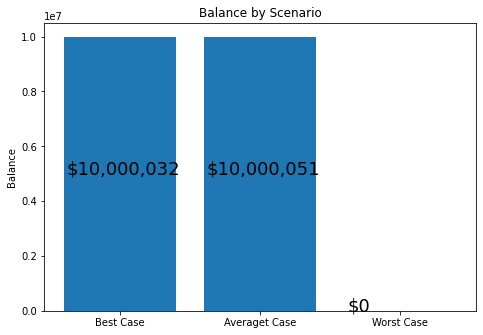

In [25]:
# Plot visual graph
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
cases = ['Best Case', 'Averaget Case', 'Worst Case']
students = [math.trunc(balance1),math.trunc(balance2),math.trunc(balance3)]
plt.title(f"Balance by Scenario")
ax.bar(cases,students)
ax.set_ylabel('Balance')

for i, v in enumerate(students):
    ax.text(i-0.38, 
    v/2, 
    f"${students[i]:,}".format(),
    fontsize=18)
plt.show()

In [27]:
# Probability
prob = .01 # 2D permuatation with replacement
prob_94 = pow(prob, 91)
print(f"Probability of each draw = {prob}".format()) 
print(f"Probability of {draws} consecutive draws = {prob_94}".format())

Probability of each draw = 0.01
Probability of 91 consecutive draws = 1.0000000000000019e-182
